# Custom SGD implementation for Linear Regression on Boston House dataset
   ### Importing libraries
   ### Data Loading and Preprocessing
   ### Fixing Total Number of Iterations for 1. SKLearn SGD and 2. Custom SGD
    
   ## 1. SKLearn Implementation of SGD
       1.1 Plot and MSE for the SK Learn SGD
       1.2 Obtaining Weights from SKLearn SGD
   ## 2. Custom Implementation Of SGD
       . Setting custom parameters
       2.1 Plot and MSE for the Custom SGD
       2.2 Obtaining Weights from Custom SGD
   ## 3. Improved Custom SGD
       . Setting new custom parameters
       3.1 Plot and MSE for the Custom SGD Improved
       3.2 Obtaining Weights from Custom SGD Improved
   ## Comparison
   ## Conlusion
   ## References
   ----------------------------------------------

## Importing libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from numpy import random
from sklearn.model_selection import train_test_split
print("DONE")

DONE


## Data Loading and Preprocessing:

In [2]:
boston_data=pd.DataFrame(load_boston().data,columns=load_boston().feature_names)
Y=load_boston().target
X=load_boston().data
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

In [3]:
# data overview
boston_data.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [4]:
print(X.shape)
print(Y.shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(506, 13)
(506,)
(354, 13)
(152, 13)
(354,)
(152,)


In [5]:
## Before standardizing data
x_train

array([[6.14700e-01, 0.00000e+00, 6.20000e+00, ..., 1.74000e+01,
        3.96900e+02, 7.60000e+00],
       [9.91655e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.38160e+02, 2.99700e+01],
       [1.68118e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.96900e+02, 3.08100e+01],
       ...,
       [1.53800e-02, 9.00000e+01, 3.75000e+00, ..., 1.59000e+01,
        3.86340e+02, 3.11000e+00],
       [2.76300e-02, 7.50000e+01, 2.95000e+00, ..., 1.83000e+01,
        3.95630e+02, 4.32000e+00],
       [1.10270e-01, 2.50000e+01, 5.13000e+00, ..., 1.97000e+01,
        3.96900e+02, 6.73000e+00]])

In [6]:
# standardizing data
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [7]:
## After standardizing data
x_train

array([[-0.34619553, -0.48245184, -0.69898653, ..., -0.47534613,
         0.42465313, -0.70738157],
       [ 1.17796839, -0.48245184,  1.04744336, ...,  0.81304075,
        -0.23695062,  2.51330519],
       [ 2.30779645, -0.48245184,  1.04744336, ...,  0.81304075,
         0.42465313,  2.63424291],
       ...,
       [-0.4443977 ,  3.28862659, -1.05854562, ..., -1.16555338,
         0.30571313, -1.35382249],
       [-0.44239047,  2.66011351, -1.17595267, ..., -0.06122177,
         0.4103488 , -1.17961458],
       [-0.42884941,  0.56506994, -0.85601846, ...,  0.58297166,
         0.42465313, -0.83263849]])

In [8]:
x_test

array([[-0.44282468, -0.48245184, -1.33151702, ..., -1.16555338,
         0.34648612, -0.55620941],
       [-0.32398321, -0.48245184, -0.41427443, ...,  1.18115128,
         0.39570656,  0.54518771],
       [ 0.99372379, -0.48245184,  1.04744336, ...,  0.81304075,
        -4.00462296,  0.66900491],
       ...,
       [-0.35841754,  0.35556559, -1.02625868, ..., -2.49995407,
         0.37847378, -0.42087434],
       [-0.43665551, -0.48245184,  0.14194148, ...,  1.18115128,
         0.36935054, -0.40935646],
       [-0.44355057,  3.07912223, -1.50028965, ..., -0.52135994,
         0.42465313, -0.97085304]])

In [9]:
## Adding the PRIZE Column in the data
train_data=pd.DataFrame(x_train)
train_data['price']=y_train
train_data.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,price
0,-0.346196,-0.482452,-0.698987,-0.287348,-0.386734,0.447534,0.446806,-0.271253,-0.103623,-0.562557,-0.475346,0.424653,-0.707382,30.1
1,1.177968,-0.482452,1.047443,-0.287348,1.185920,-0.651687,0.338275,-1.112350,1.808173,1.667422,0.813041,-0.236951,2.513305,6.3
2,2.307796,-0.482452,1.047443,-0.287348,1.245106,-1.476821,1.072667,-1.147623,1.808173,1.667422,0.813041,0.424653,2.634243,7.2


In [10]:
x_test=np.array(x_test)
y_test=np.array(y_test)

In [11]:
type(x_test)

numpy.ndarray

## Fixing Total Number of Iterations for 1. SKLearn SGD and 2. Custom SGD

In [12]:
n_iter=100

# 1. SKLearn Implementation of SGD

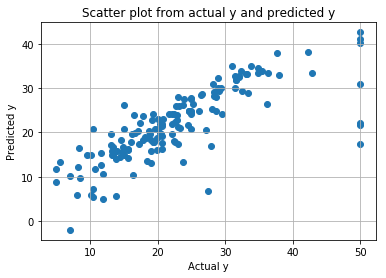

In [13]:
# SkLearn SGD classifier
clf_ = SGDRegressor(max_iter=n_iter)
clf_.fit(x_train, y_train)
y_pred_sksgd=clf_.predict(x_test)
plt.scatter(y_test,y_pred_sksgd)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()

## 1.1 MSE for the SK Learn SGD

In [14]:
print('Mean Squared Error :',mean_squared_error(y_test, y_pred_sksgd))

Mean Squared Error : 38.08992711452377


## 1.2 Obtaining Weights from SKLearn SGD

In [15]:
# SkLearn SGD classifier predicted weight matrix
sklearn_w=clf_.coef_
sklearn_w

array([-0.19630281,  0.72485956,  0.16514879,  0.4395183 , -1.54621224,
        3.88342501, -0.36805966, -2.4051181 ,  0.94102983, -1.28880663,
       -1.98715573,  0.81344041, -2.43031913])

In [16]:
type(sklearn_w)

numpy.ndarray

# 2. Custom Implementation Of SGD

In [17]:
def My2CustomSGD(train_data,learning_rate,n_iter,k,divideby):
    w=np.zeros(shape=(1,train_data.shape[1]-1))
    b=0
    cur_iter=1
    while(cur_iter<=n_iter): 
#         print("LR: ",learning_rate)
        temp=train_data.sample(k)
        #print(temp.head(3))
        y=np.array(temp['price'])
        x=np.array(temp.drop('price',axis=1))
        w_gradient=np.zeros(shape=(1,train_data.shape[1]-1))
        b_gradient=0
        for i in range(k):
            prediction=np.dot(w,x[i])+b
#             w_gradient=w_gradient+(-2/k)*x[i]*(y[i]-(prediction))
#             b_gradient=b_gradient+(-2/k)*(y[i]-(prediction))
            w_gradient=w_gradient+(-2)*x[i]*(y[i]-(prediction))
            b_gradient=b_gradient+(-2)*(y[i]-(prediction))
        w=w-learning_rate*(w_gradient/k)
        b=b-learning_rate*(b_gradient/k)
        
        cur_iter=cur_iter+1
        learning_rate=learning_rate/divideby
    return w,b

In [18]:
def predict(x,w,b):
    y_pred=[]
    for i in range(len(x)):
        y=np.asscalar(np.dot(w,x[i])+b)
        y_pred.append(y)
    return np.array(y_pred)

## Setting custom parameters: As mentioned in the assignment video, the following parameters are set
1. As mentioned Learning Rate=1 initially and will be divided by 2 over the Iterations
2. As mentioned size of K is kept as k=10

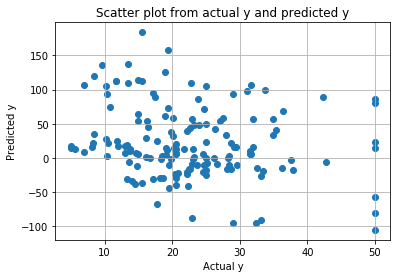

Mean Squared Error : 3085.7843896245045


In [19]:
w,b=My2CustomSGD(train_data,learning_rate=1,n_iter=100,divideby=2,k=10)
y_pred_customsgd=predict(x_test,w,b)

plt.scatter(y_test,y_pred_customsgd)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test, y_pred_customsgd))

## 2.1 MSE for the Custom SGD

In [20]:
print('Mean Squared Error :',mean_squared_error(y_test, y_pred_customsgd))

Mean Squared Error : 3085.7843896245045


## 2.2 Obtaining Weights from Custom SGD

In [21]:
# weight vector obtained from impemented SGD Classifier
custom_w=w
print(custom_w)
print(type(custom_w))

[[ -0.34935233  17.4270328   -2.41475015 -29.21923043  27.50791757
   -4.42459399   0.03227756   9.27777604   3.52228874   7.9093719
  -29.96333047 -25.90654663  -3.34966326]]
<class 'numpy.ndarray'>


# 3. Improved SGD

## Changes made in the following parameters to improve the result
1. Learning Rate=0.01 initially and will not be divided by any number over the Iterations
2. size of K is kept as k=10
3. Iterations = 1000

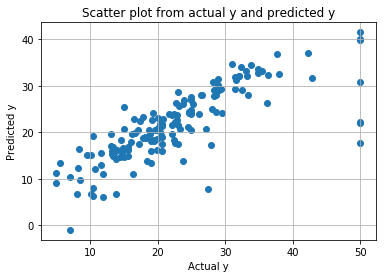

Mean Squared Error : 37.25145174243342


In [22]:
w,b=My2CustomSGD(train_data,learning_rate=0.01,n_iter=1000,divideby=1,k=10)
y_pred_customsgd_improved=predict(x_test,w,b)

plt.scatter(y_test,y_pred_customsgd_improved)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test, y_pred_customsgd_improved))

## 3.1 MSE for the Custom SGD Improved

In [23]:
print('Mean Squared Error :',mean_squared_error(y_test, y_pred_customsgd_improved))

Mean Squared Error : 37.25145174243342


## 3.2 Obtaining Weights from Custom SGD Improved

In [24]:
# weight vector obtained from impemented SGD Classifier
custom_w_improved=w
print(custom_w_improved)
print(type(custom_w_improved))

[[-0.27870658  0.88097128  0.30956892  0.59916513 -1.54451397  3.55844852
  -0.24301574 -2.49201066  1.12726527 -1.62753122 -1.94845116  0.74327706
  -2.26674382]]
<class 'numpy.ndarray'>


#  Comparision 

In [25]:
###
from prettytable import PrettyTable
x=PrettyTable()
x.field_names=['Model','Weight Vector','MSE']
x.add_row(['SKLearn SGD',sklearn_w,mean_squared_error(y_test, y_pred_sksgd)])
x.add_row(['Custom SGD',custom_w,mean_squared_error(y_test,y_pred_customsgd)])
x.add_row(['Custom SGD Improved',custom_w_improved,mean_squared_error(y_test,y_pred_customsgd_improved)])
print(x)

+---------------------+---------------------------------------------------------------------------+--------------------+
|        Model        |                               Weight Vector                               |        MSE         |
+---------------------+---------------------------------------------------------------------------+--------------------+
|     SKLearn SGD     |  [-0.19630281  0.72485956  0.16514879  0.4395183  -1.54621224  3.88342501 | 38.08992711452377  |
|                     |   -0.36805966 -2.4051181   0.94102983 -1.28880663 -1.98715573  0.81344041 |                    |
|                     |                                -2.43031913]                               |                    |
|      Custom SGD     |     [[ -0.34935233  17.4270328   -2.41475015 -29.21923043  27.50791757    | 3085.7843896245045 |
|                     |        -4.42459399   0.03227756   9.27777604   3.52228874   7.9093719     |                    |
|                     |         

## Conclusion
1. We can see the our plain custom SGD performed very poor as compared to the SKLearn SGD.
1. When we changed the learning rate and  Batch size, the our custom SGD performed as good as the SKLearn SGD

## Reference

[1] My Medium Blog: https://medium.com/@nikhilparmar9/simple-sgd-implementation-in-python-for-linear-regression-on-boston-housing-data-f63fcaaecfb1<br>
[2]https://machinelearningmastery.com/implement-linear-regression-stochastic-gradient-descent-scratch-python/ <br>
[3]https://www.kaggle.com/premvardhan/stocasticgradientdescent-implementation-lr-python <br>
[4]https://www.kaggle.com/arpandas65/simple-sgd-implementation-of-linear-regression/notebook <br>
[5]https://www.kaggle.com/tentotheminus9/linear-regression-from-scratch-gradient-descent<br>